In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# loading the dataset from the "../input/" directory
iris = pd.read_csv("Iris.csv") # the iris dataset is now a Pandas DataFrame

# exploring the data
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4      

In [17]:
iris.shape

(150, 6)

In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [23]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [2]:
print (iris['Species'].count())
print (iris['Species'].value_counts())

150
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


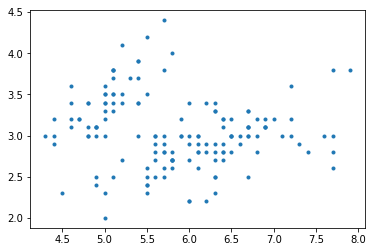

In [3]:
plt.plot(iris['SepalLengthCm'],iris["SepalWidthCm"],marker='.',linestyle='none')
plt.show()

C:\Users\Bharath\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


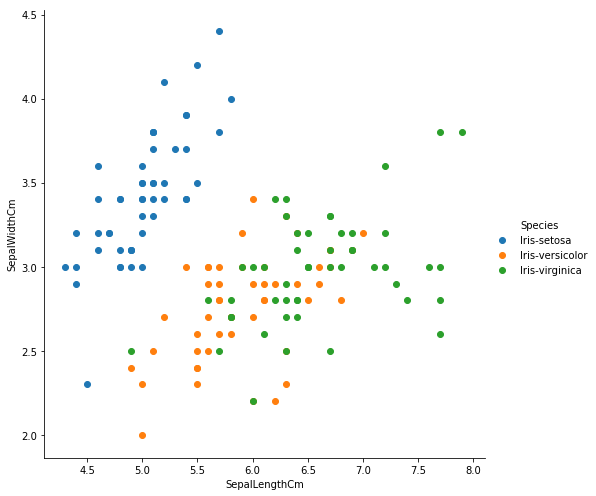

In [4]:
sns.FacetGrid(iris, hue="Species", size=7) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

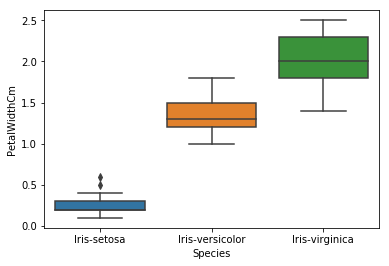

In [7]:

sns.boxplot(x="Species", y="PetalWidthCm", data=iris)

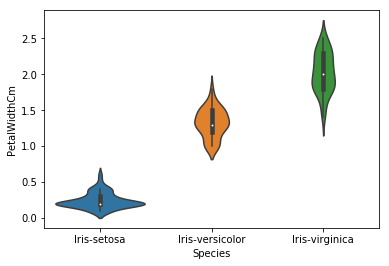

In [9]:
sns.violinplot(x="Species", y="PetalWidthCm", data=iris, size=6)

C:\Users\Bharath\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


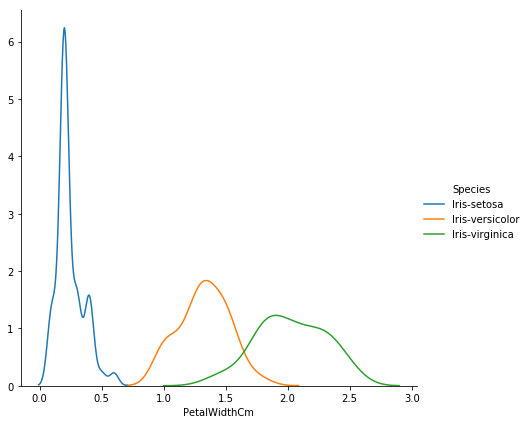

In [10]:
sns.FacetGrid(iris, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalWidthCm") \
   .add_legend()

C:\Users\Bharath\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


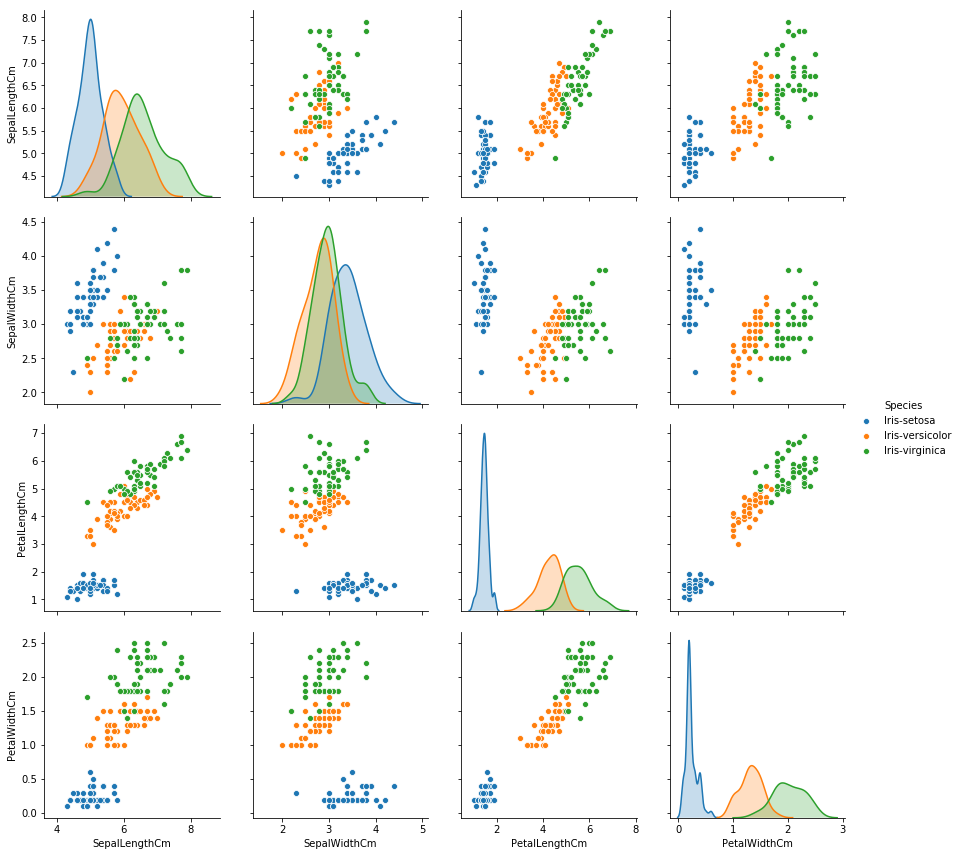

In [11]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.andrews_curves' is deprecated, import 'pandas.plotting.andrews_curves' instead.
  


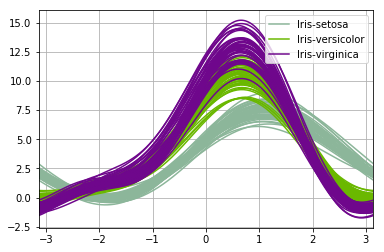

In [12]:
from pandas.tools.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")

C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


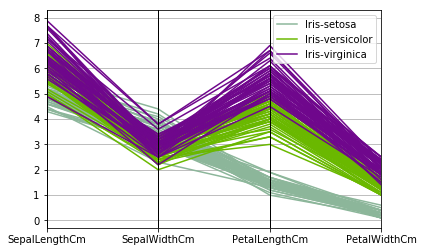

In [13]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris.drop("Id", axis=1), "Species")

C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.radviz' is deprecated, import 'pandas.plotting.radviz' instead.
  


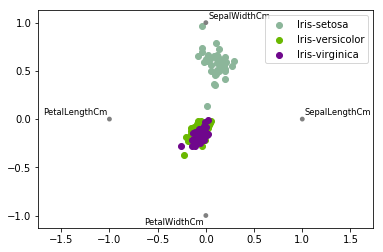

In [14]:
from pandas.tools.plotting import radviz
radviz(iris.drop("Id", axis=1), "Species")

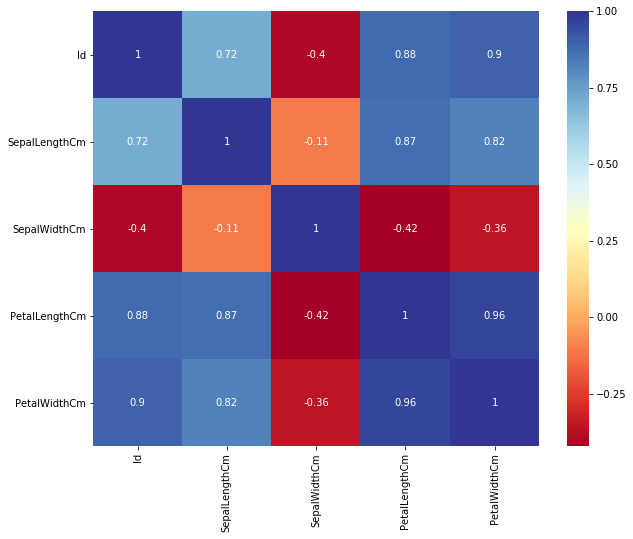

In [22]:
fig,ax = plt.subplots(figsize=(7,7))
sns.heatmap(iris.corr(),annot=True,cmap='RdYlBu')
fig=plt.gcf()
fig.set_size_inches(10,8)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

      micro avg       0.93      0.93      0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]
accuracy is 0.9333333333333333


C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [29]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [30]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [31]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


In [32]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy is 0.9666666666666667
